In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, ConfusionMatrixDisplay
import xgboost as xg

In [99]:
data_df=pd.read_csv("D:/AI engineering/machine learning/pytorch_classicification/CollegePlacement.csv")
data_df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [100]:
data_df=data_df.drop("College_ID",axis=1)

In [101]:
data_df["Internship_Experience"]=data_df["Internship_Experience"].apply(lambda x:1 if x=="Yes" else 0)
data_df["Placement"]=data_df["Placement"].apply(lambda x:1 if x=="Yes" else 0)
data_df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,0
1,97,5.52,5.37,8,0,7,8,0,0
2,109,5.36,5.83,9,0,3,1,1,0
3,122,5.47,5.75,6,1,1,6,1,0
4,96,7.91,7.69,7,0,8,10,2,0


In [102]:
print(data_df["Internship_Experience"].unique())
print(data_df["Placement"].unique())

[0 1]
[0 1]


In [103]:
data_df.shape

(10000, 9)

<Axes: ylabel='count'>

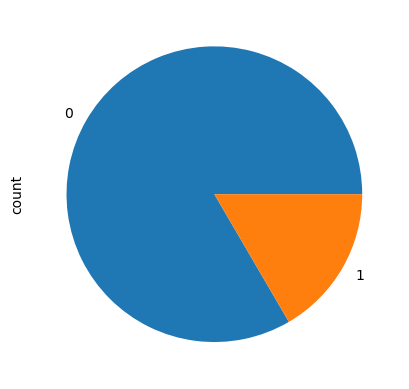

In [104]:
data_df["Placement"].value_counts().plot.pie(autopct="")

In [105]:
X=data_df.drop(["Placement"],axis=1)
Y=data_df["Placement"]

In [106]:
rus=RandomUnderSampler(random_state=42)
X_rus,Y_rus=rus.fit_resample(X,Y)

<Axes: ylabel='count'>

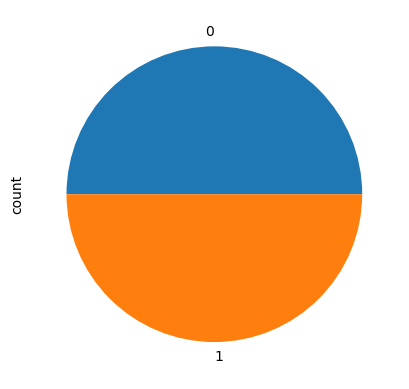

In [107]:
Y_rus.value_counts().plot.pie(autopct="")

In [108]:
x_train,x_test,y_train,y_test=train_test_split(X_rus,Y_rus,test_size=0.3,random_state=32)

***XGboost***

In [109]:
model = xg.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [110]:
model.fit(x_train,y_train)

C:\Users\srini\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:10:13] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [111]:
y_pred=model.predict(x_test)
report=classification_report(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print(report)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       1.00      1.00      1.00       500

    accuracy                           1.00       996
   macro avg       1.00      1.00      1.00       996
weighted avg       1.00      1.00      1.00       996

1.0


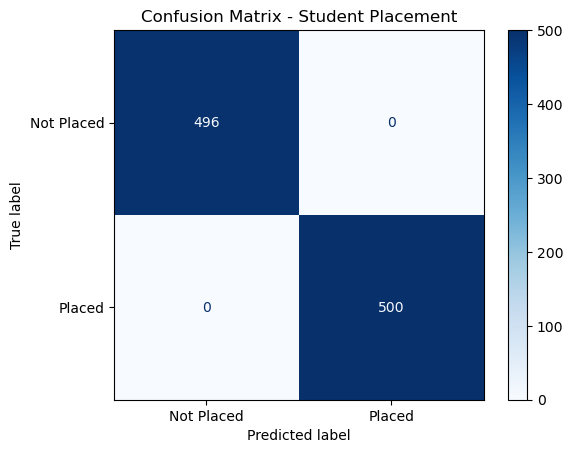

In [112]:
cm=confusion_matrix(y_test,y_pred)
class_names = ['Not Placed', 'Placed']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Student Placement")
plt.show()